### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석

> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상품 카테고리의 문자열 변수 
quantity: 거래당 각 제품(항목)의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수  

### 쇼핑몰 별로 고객들의 구매 내용을 조사한다.
- 성별별로 자주 구매하는 카테고리 분석
- 나이대 별로 자주 구매하는 카테고리 분석
- 자주 결제하는 결제 방식 분석 
- 구매 총액 분석
- 거래 빈도수 분석

- invoice_date를 사용하여 Recency를 구한다.
- quantity 와 price를 사용하여 Montetary를 구한다.
- customer_id를 사용하여 Frequency를 구한다.
- shopping_mall을 사용해 쇼핑몰별 데이터를 분석한다.
- gender을 사용해 성별별로 구매한 카테고리를 분석한다.
- age별로 구매한 마테고리를 분석한다
- payment_method을 사용해 결제 방법을 분석한다.

In [27]:
import pandas as pd

df = pd.read_csv('./datasets/customer_shopping_data.csv')
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [28]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

df['invoice_date'] = pd.to_datetime(df['invoice_date'], yearfirst=True)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


In [29]:
# 결측 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [30]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [31]:
# 음수 데이터 확인
display(df[df['price'] <= 0])
display(df[df['quantity'] <= 0])
display(df[df['age'] <= 0])

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [32]:
cs_df = df.copy()

In [33]:
cs_df.groupby('shopping_mall')['age'].mean().reset_index()


,shopping_mall,age
0,Cevahir AVM,43.172511
1,Emaar Square Mall,43.561630
2,Forum Istanbul,43.537497
3,Istinye Park,43.383601
4,Kanyon,43.498966
5,Mall of Istanbul,43.440455
6,Metrocity,43.499301
7,Metropol AVM,43.212873
8,Viaport Outlet,43.298942
9,Zorlu Center,43.532217


In [34]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
age_labels = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', 'etc']

cs_df['age_group'] = pd.cut(cs_df['age'], bins=age_bins, labels=age_labels, right=False)
cs_df = cs_df.drop(columns=['age'], axis=1)
cs_df

,invoice_no,customer_id,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
0,I138884,C241288,Female,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,20s
1,I317333,C111565,Male,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,20s
2,I127801,C266599,Male,Clothing,1,300.08,Cash,2021-11-09,Metrocity,20s
3,I173702,C988172,Female,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,60s
4,I337046,C189076,Female,Books,4,60.60,Cash,2021-10-24,Kanyon,50s
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,40s
99453,I325143,C569580,Male,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20s
99454,I824010,C103292,Male,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,60s
99455,I702964,C800631,Male,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,50s


In [35]:
cs_df['total'] =cs_df['quantity'] * cs_df['price']
cs_df = cs_df.drop(columns=['quantity', 'price'], axis=1)
cs_df

,invoice_no,customer_id,gender,category,payment_method,invoice_date,shopping_mall,age_group,total
0,I138884,C241288,Female,Clothing,Credit Card,2022-08-05,Kanyon,20s,7502.00
1,I317333,C111565,Male,Shoes,Debit Card,2021-12-12,Forum Istanbul,20s,5401.53
2,I127801,C266599,Male,Clothing,Cash,2021-11-09,Metrocity,20s,300.08
3,I173702,C988172,Female,Shoes,Credit Card,2021-05-16,Metropol AVM,60s,15004.25
4,I337046,C189076,Female,Books,Cash,2021-10-24,Kanyon,50s,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,Souvenir,Credit Card,2022-09-21,Kanyon,40s,293.25
99453,I325143,C569580,Male,Food & Beverage,Cash,2021-09-22,Forum Istanbul,20s,20.92
99454,I824010,C103292,Male,Food & Beverage,Debit Card,2021-03-28,Metrocity,60s,20.92
99455,I702964,C800631,Male,Technology,Cash,2021-03-16,Istinye Park,50s,16800.00


In [36]:
cs_df.groupby(['shopping_mall', 'payment_method']).size().reset_index(name='payment_method_count')


,shopping_mall,payment_method,payment_method_count
0,Cevahir AVM,Cash,2228
1,Cevahir AVM,Credit Card,1779
2,Cevahir AVM,Debit Card,984
3,Emaar Square Mall,Cash,2114
4,Emaar Square Mall,Credit Card,1696
5,Emaar Square Mall,Debit Card,1001
6,Forum Istanbul,Cash,2183
7,Forum Istanbul,Credit Card,1750
8,Forum Istanbul,Debit Card,1014
9,Istinye Park,Cash,4436


In [37]:
cs_df.groupby(['shopping_mall', 'gender']).size().reset_index(name='gender_count')


,shopping_mall,gender,gender_count
0,Cevahir AVM,Female,2940
1,Cevahir AVM,Male,2051
2,Emaar Square Mall,Female,2842
3,Emaar Square Mall,Male,1969
4,Forum Istanbul,Female,3016
5,Forum Istanbul,Male,1931
6,Istinye Park,Female,5874
7,Istinye Park,Male,3907
8,Kanyon,Female,11906
9,Kanyon,Male,7917


In [38]:
cs_df.groupby(['shopping_mall', 'category']).size().reset_index(name='category_count')


,shopping_mall,category,category_count
0,Cevahir AVM,Books,258
1,Cevahir AVM,Clothing,1729
2,Cevahir AVM,Cosmetics,732
3,Cevahir AVM,Food & Beverage,772
4,Cevahir AVM,Shoes,490
...,...,...,...
75,Zorlu Center,Food & Beverage,750
76,Zorlu Center,Shoes,519
77,Zorlu Center,Souvenir,257
78,Zorlu Center,Technology,250


In [39]:
cs_df.groupby(['shopping_mall', 'age_group']).size().reset_index(name='age_count')


C:\Users\qortl\AppData\Local\Temp\ipykernel_16844\2806935632.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cs_df.groupby(['shopping_mall', 'age_group']).size().reset_index(name='age_count')


,shopping_mall,age_group,age_count
0,Cevahir AVM,0s,0
1,Cevahir AVM,10s,190
2,Cevahir AVM,20s,986
3,Cevahir AVM,30s,985
4,Cevahir AVM,40s,963
...,...,...,...
75,Zorlu Center,30s,1001
76,Zorlu Center,40s,964
77,Zorlu Center,50s,1002
78,Zorlu Center,60s,965


In [40]:
m_rfm = cs_df.groupby('shopping_mall')['total'].sum().reset_index(name='Monetary')
m_rfm

,shopping_mall,Monetary
0,Cevahir AVM,12645138.20
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24
3,Istinye Park,24618827.68
4,Kanyon,50554231.10
5,Mall of Istanbul,50872481.68
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
8,Viaport Outlet,12521339.72
9,Zorlu Center,12901053.82


In [41]:
cs_df['invoice_date'].max()

Timestamp('2023-03-08 00:00:00')

In [42]:
cs_df['invoice_date'] = pd.to_datetime(cs_df['invoice_date']).apply(lambda x: (pd.to_datetime('2023-03-08') - x).days)
cs_df

,invoice_no,customer_id,gender,category,payment_method,invoice_date,shopping_mall,age_group,total
0,I138884,C241288,Female,Clothing,Credit Card,215,Kanyon,20s,7502.00
1,I317333,C111565,Male,Shoes,Debit Card,451,Forum Istanbul,20s,5401.53
2,I127801,C266599,Male,Clothing,Cash,484,Metrocity,20s,300.08
3,I173702,C988172,Female,Shoes,Credit Card,661,Metropol AVM,60s,15004.25
4,I337046,C189076,Female,Books,Cash,500,Kanyon,50s,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,Souvenir,Credit Card,168,Kanyon,40s,293.25
99453,I325143,C569580,Male,Food & Beverage,Cash,532,Forum Istanbul,20s,20.92
99454,I824010,C103292,Male,Food & Beverage,Debit Card,710,Metrocity,60s,20.92
99455,I702964,C800631,Male,Technology,Cash,722,Istinye Park,50s,16800.00


In [43]:
r_rfm = cs_df.groupby('shopping_mall')['invoice_date'].min().reset_index(name='Recency')
r_rfm

,shopping_mall,Recency
0,Cevahir AVM,0
1,Emaar Square Mall,0
2,Forum Istanbul,0
3,Istinye Park,0
4,Kanyon,0
5,Mall of Istanbul,0
6,Metrocity,0
7,Metropol AVM,0
8,Viaport Outlet,0
9,Zorlu Center,0


In [44]:
f_rfm = cs_df['shopping_mall'].value_counts().reset_index(name='Frequency')
f_rfm

,shopping_mall,Frequency
0,Mall of Istanbul,19943
1,Kanyon,19823
2,Metrocity,15011
3,Metropol AVM,10161
4,Istinye Park,9781
5,Zorlu Center,5075
6,Cevahir AVM,4991
7,Forum Istanbul,4947
8,Viaport Outlet,4914
9,Emaar Square Mall,4811


In [45]:
rfm = pd.merge(r_rfm, f_rfm, on='shopping_mall')
rfm = pd.merge(rfm, m_rfm,on='shopping_mall')
rfm

,shopping_mall,Recency,Frequency,Monetary
0,Cevahir AVM,0,4991,12645138.20
1,Emaar Square Mall,0,4811,12406100.29
2,Forum Istanbul,0,4947,12303921.24
3,Istinye Park,0,9781,24618827.68
4,Kanyon,0,19823,50554231.10
5,Mall of Istanbul,0,19943,50872481.68
6,Metrocity,0,15011,37302787.33
7,Metropol AVM,0,10161,25379913.19
8,Viaport Outlet,0,4914,12521339.72
9,Zorlu Center,0,5075,12901053.82


In [46]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [47]:
rfm[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm

,shopping_mall,Recency,Frequency,Monetary
0,Cevahir AVM,0.0,0.011895,0.008847
1,Emaar Square Mall,0.0,0.000000,0.002649
2,Forum Istanbul,0.0,0.008988,0.000000
3,Istinye Park,0.0,0.328443,0.319299
4,Kanyon,0.0,0.992070,0.991748
5,Mall of Istanbul,0.0,1.000000,1.000000
6,Metrocity,0.0,0.674068,0.648167
7,Metropol AVM,0.0,0.353555,0.339032
8,Viaport Outlet,0.0,0.006807,0.005637
9,Zorlu Center,0.0,0.017446,0.015482


In [48]:
rfm['Recency'] = 1- rfm['Recency']

In [49]:
rfm['Total'] = rfm['Recency'] + rfm['Frequency'] + rfm['Monetary']
rfm

,shopping_mall,Recency,Frequency,Monetary,Total
0,Cevahir AVM,1.0,0.011895,0.008847,1.020742
1,Emaar Square Mall,1.0,0.000000,0.002649,1.002649
2,Forum Istanbul,1.0,0.008988,0.000000,1.008988
3,Istinye Park,1.0,0.328443,0.319299,1.647742
4,Kanyon,1.0,0.992070,0.991748,2.983818
5,Mall of Istanbul,1.0,1.000000,1.000000,3.000000
6,Metrocity,1.0,0.674068,0.648167,2.322235
7,Metropol AVM,1.0,0.353555,0.339032,1.692588
8,Viaport Outlet,1.0,0.006807,0.005637,1.012444
9,Zorlu Center,1.0,0.017446,0.015482,1.032929


In [63]:
display(cs_df)

,invoice_no,customer_id,gender,category,payment_method,invoice_date,shopping_mall,age_group,total
0,I138884,C241288,Female,Clothing,Credit Card,215,Kanyon,20s,7502.00
1,I317333,C111565,Male,Shoes,Debit Card,451,Forum Istanbul,20s,5401.53
2,I127801,C266599,Male,Clothing,Cash,484,Metrocity,20s,300.08
3,I173702,C988172,Female,Shoes,Credit Card,661,Metropol AVM,60s,15004.25
4,I337046,C189076,Female,Books,Cash,500,Kanyon,50s,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,Souvenir,Credit Card,168,Kanyon,40s,293.25
99453,I325143,C569580,Male,Food & Beverage,Cash,532,Forum Istanbul,20s,20.92
99454,I824010,C103292,Male,Food & Beverage,Debit Card,710,Metrocity,60s,20.92
99455,I702964,C800631,Male,Technology,Cash,722,Istinye Park,50s,16800.00


#### shopping_mall 별로 RFM을 구하였다.
- 나이대별로 계급을 나누어 구간을 정하기.
- invoice_date를 보기 편하게 (년-월-일)로 바꿔기.
- shopping_mall의 중복 갯수를 계산하여 Frequency를 구하기.
- quantity와 가격 price를 곱하여 customer_id별 total을 구하고 shopping_mall별로 total을 모두 합하여 Monetory를 구하기.

위에서 구해진 RFM 점수를 모두 합하여 총점을 구한 후 시각화를 진행

### 기획: 쇼핑몰별 카테고리, 성별, 나이, 결제방식을 분석해 고객들의 성향을 파악한다.


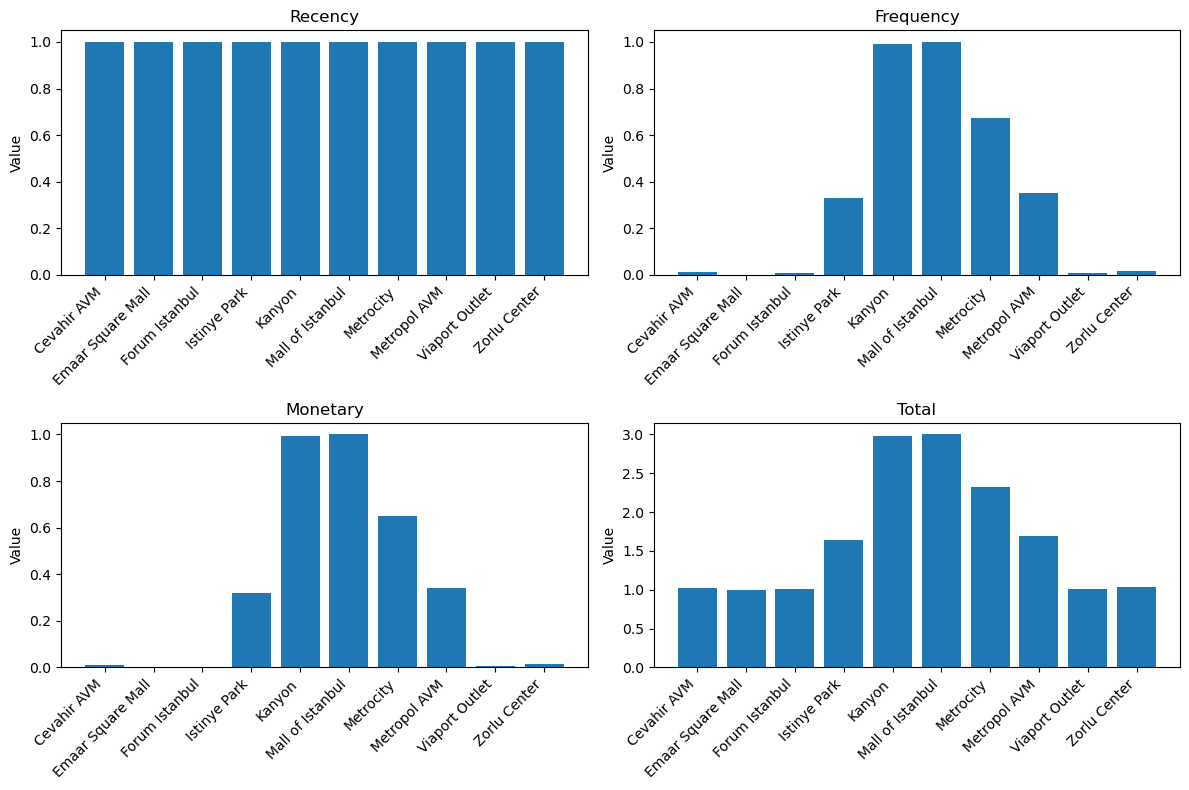

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

for i, data in enumerate(['Recency', 'Frequency', 'Monetary', 'Total'], start=1):
    plt.subplot(2, 2, i)
    plt.bar(rfm['shopping_mall'], rfm[data])
    plt.title(data)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

### RFM 데이터 분석 결과

#### Recency
- 모든 쇼핑몰에서 고객들이 최근에 방문했음을 보여줬다.

#### Frequency
- Mall of Istanbul과 Kanyon은 고객들이 가장 자주 방문하는 쇼핑몰로 나타났다.
- Cevahir AVM, Emaar Square Mall, Forum Istanbul, Viaport Outlet, Zorlu Center는 다른 쇼핑몰에 비해 구매 빈도가 매우 낮음을 보여준다
- 쇼핑몰별로 구매빈도가 양극화하는 현상을 보여준다.

#### Monetary
- Emaar Square Mall과 Mall of Istanbul은 평균적으로 높은 구매액을 보이며, 특히 Mall of Istanbul은 구매액과 구매 빈도 모두 높은 수준을 보인다.
- Forum Istanbul은 가장 낮은 평균 구매액을 보여줬으며,  Viaport Outlet과 Zorlu Cente는 낮은 구매 빈도와 상반되는 높은 구매 금액을 보여줬다. 
- Metrocity는 반대로 구객들의 구매 빈도는 높았지만 모든 쇼핑몰중 제일 낮은 구매 금액을 나타냈다.

#### Total 지표 분석
- Mall of Istanbul은 Total 지표가 가장 높은 것으로 나타났으며, Kanyon과 Emaar Square Mall이 이를 뒤를 이었다.
- 모든 지표가 가장 낮았던 Forum Istanbul이 Total 점수가 가장 낮았고, 다음으로 Metropol AVM가 뒤를 이었다.

### 결론 도출
    예상대로 구매 빈도가 높으면 구매 금액도 높다.성과를 평가하고 개선점을 도출할 수 있습니다.

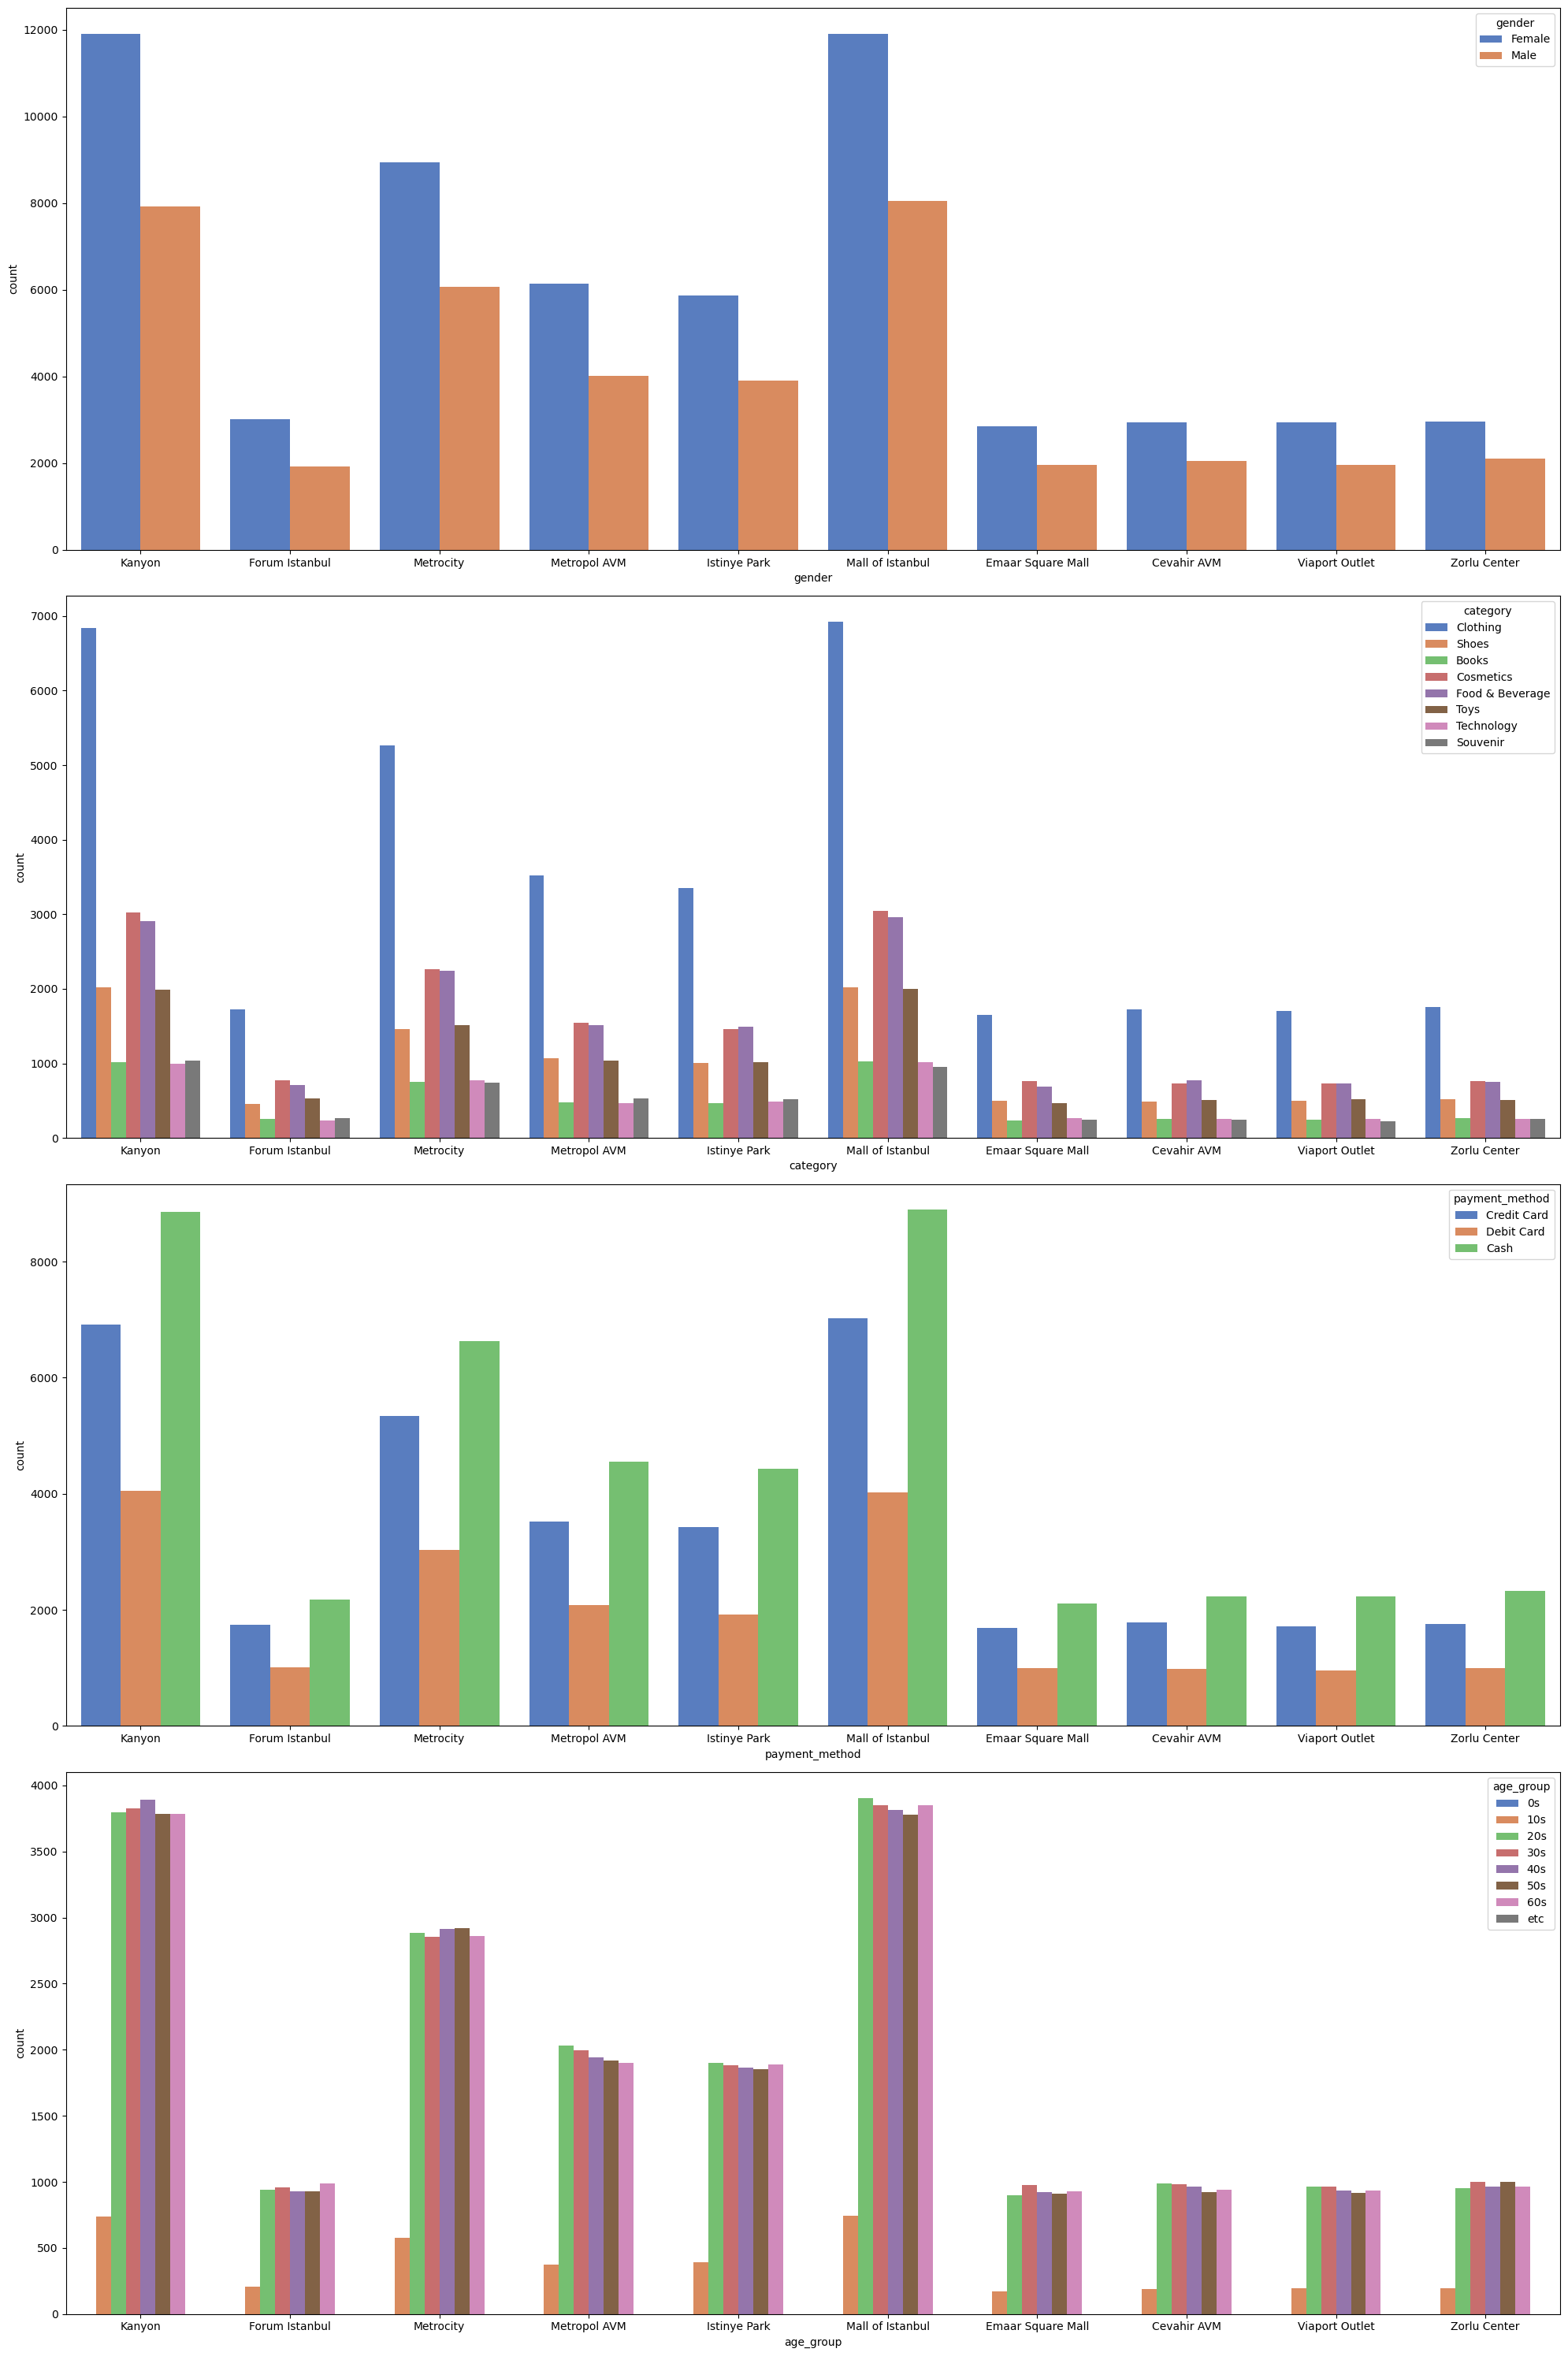

In [52]:
fig, axes = plt.subplots(4, 1, figsize=(20, 30))

for i, col in enumerate(['gender', 'category', 'payment_method', 'age_group']):
    sns.countplot(ax=axes[i], x='shopping_mall', data=cs_df, hue=col, palette='muted')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

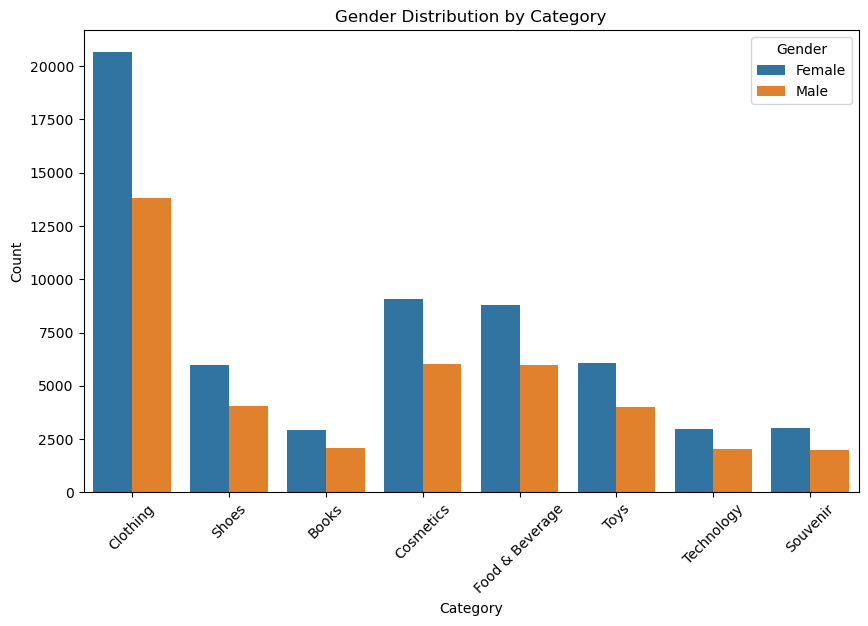

In [62]:
# 성별별로 구매가 이루어지는 카테고리
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='gender', data=cs_df)
plt.title('Gender Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

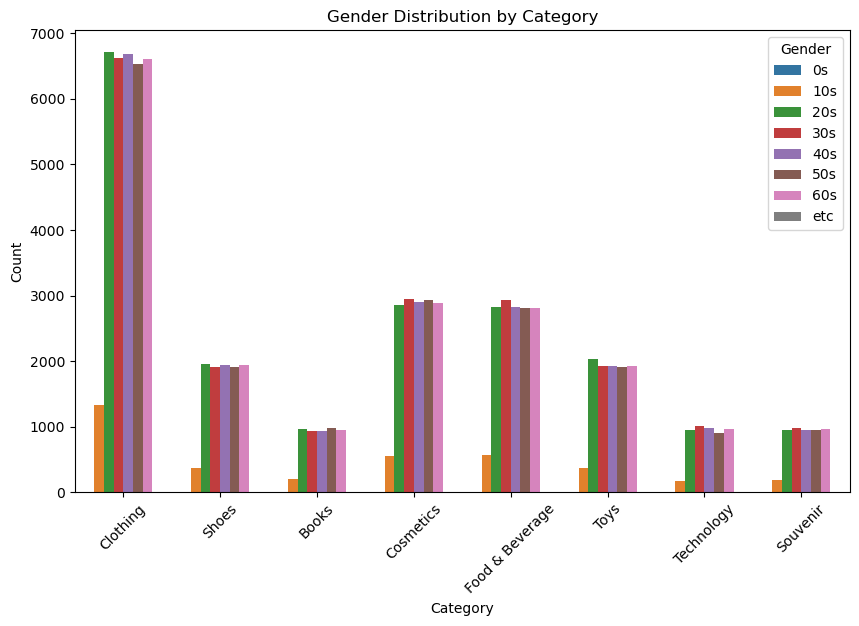

In [64]:
# 나이대별로 구매가 이루어지는 카테고리
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='age_group', data=cs_df)
plt.title('Gender Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

### 쇼핑몰별 데이터 분석 보고서

#### gender
- 모든 쇼핑몰에서 남성보다 여성의 비율이 높음을 보여주고 있다.

#### category
- 모든 쇼핑몰에서 의류의 구매 비중이 높은 것을 알수 있다.
- 의류를 제외하면 화장품과 음식이 다음으로 높은 비중을 보여주고 있다.
- 제일 낮은 구매율을 보여주는 카테고리들은 기념품과 공구, 책 임을 보여주고 있다.

#### payment_method
- 모든 쇼핑몰에 고객들이 현금 결제를 선호하는 것으로 나타냈다.

#### age_group
- 모든 쇼핑몰에서 20대부터 60대가 쇼핑에 적극적으로 소비하고 있음을 보여준다
- 하지만 10대의 비율이 모든 쇼핑몰에서 타 나이대에 비해 저조함을 보여주고 있다.

#### 결론 도출
- 남성보다는 여성이 더 높은 비율로 구매까지 이어진다.
- 의식주 중에 의, 식에 해당되는 의류와 식품이 구매가 많이 이루어진다.
- 10대 이후 연령대에서 쇼핑이 활발하게 일어난다.

### 마케팅 전략

#### 구매빈도와 구매금액 전략
    구매빈도를 높이기는 전략보다는 구매 금액을 높이는 전략이 좋아보인다.
    고객들이 의류에 관심을 많이 보이고 있기 때문에 가치 높은 명품같은 의류를 많이 구비하는 전략이 필요해 보인다.

#### 성별 전략
    여성고객들이 쇼핑에 소비가 적극적으로 판단되기 때문에 여성고객 유지에 대한 전략이 필요하다.
    여성 고객들을 유지하기 위해서는 화장품과 의류의 상품폭을 넓히는 전략이 필요해 보이고
    상대적으로 비율이 낮은 남성 고객들을 위해 남성들이 관심이 많은 카테고리를 추가해 남성 고객들에 호응을 이끄는 전략이 필요해 보인다.

#### 나이대 전략
    10대의 구매가 너무 저조 함으로 10들을 위한 이벤트나 혜택을 통해 10대 고객을 모으는 전략이 필요하다.
    10대가 경제 활동이 적은 점은 가만하여 낮은 비교적 낮은 가격대의 상품들을 10대 취향에 맞추는 전략이 필요해 보인다.

#### 카테고리 전략
    의류의 구매빈도 비중이 굉장히 높으므로 의류 카테고리의 사업을 확장하여 더 다양한 상품을 고객들에게 제공하는 전략이 필요해 보인다.
    구매율이 대체로 저조한 카테고리들을 대체하기 위해 시장조사를 토앻 새로운 카테고리를 대체 및 추가하는 전략이 필요해 보인다

성별별로 구매율이 높은 카테고리 분석  
카드가 대세인 요즘 현금 결제가 높은 이유가 궁금  
터키는 왜 여성분들이 쇼핑에 왜 관심이 많나